In [27]:
# 풋옵션의 이론가
from hst_funcs.finanace.Equity import BS
import numpy as np
from datetime import datetime

# 파라미터 설정
S0 = 586.73
K = 535
today= datetime(2025,11,12)
maturity=datetime(2025,12,11)

# 날짜 차이 계산 (단위: 일수)
days_diff = (maturity - today).days

T = days_diff/365
r = 0.0265
sigma = 0.3

opt0 = BS.bs_put(S0, K, T, r, sigma)
print('옵션 현재가치: ', opt0)

옵션 현재가치:  3.1419035008890432


In [28]:
# 이분법에 의한 내재변동성계산
def implied_vol_bisection(C_mkt, S, K, r, q, T, 
                          sigma_low=1e-6, sigma_high=5.0, tol=1e-8, max_iter=100):
    """
    C_mkt: 시장에서 관측된 옵션 프라이스
    sigma_low / sigma_high: 변동성 탐색 구간
    """
    for i in range(max_iter):
        sigma_mid = 0.5 * (sigma_low + sigma_high)
        price = BS.bs_put(S0, K, T, r, sigma_mid)

        if abs(price - C_mkt) < tol:
            return sigma_mid
        
        # 가격이 시장가격보다 작으면 sigma를 올려야 함
        if price < C_mkt:
            sigma_low = sigma_mid
        else:
            sigma_high = sigma_mid
    
    # 수렴 실패 시 중간값 반환
    return sigma_mid

In [29]:
C_mkt,q=5.88, 0
imvol=implied_vol_bisection(C_mkt, S0, K, r, q, T)
print(f'내재변동성: {imvol*100:.2f}%')

내재변동성: 37.19%


In [30]:
opt0 = BS.bs_put(S0, K, T, r, imvol)
print('옵션 현재가치: ', opt0)

옵션 현재가치:  5.880000004112787


내재변동성: 37.19%
옵션 현재가치:  5.880000004112787
옵션의 세타: -0.26093263602708394


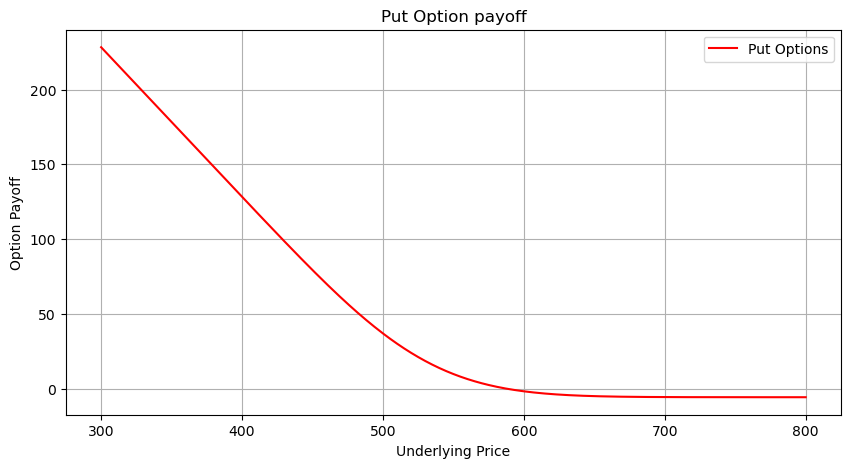

In [31]:
# 11월12일 종가 기준 풋옵션의 이론가 그래프

from hst_funcs.finanace.Equity import BS
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 파라미터 설정
S0 = 586.73
S_max = 800
K = 535
today= datetime(2025,11,12)
maturity=datetime(2025,12,11)

# 날짜 차이 계산 (단위: 일수)
days_diff = (maturity - today).days

T = days_diff/365
r = 0.0265

C_mkt,q=5.88, 0
imvol=implied_vol_bisection(C_mkt, S0, K, r, q, T)
print(f'내재변동성: {imvol*100:.2f}%')

sigma = imvol
N = 500 # 기초자산 격자

opt_values = np.zeros(N+1)
opt_payoff = np.zeros(N+1)

opt0 = BS.bs_put(S0, K, T, r, sigma)
print('옵션 현재가치: ', opt0)
theta = BS.put_theta(S0, K, T, r, sigma)
print('옵션의 세타:',theta)

S = np.linspace(300, S_max, N+1)

for i,s in enumerate(S):
    opt_values[i]=BS.bs_put(s, K, T, r, sigma)

# 하루 뒤의 option payoff
opt_payoff=opt_values-opt0-theta

plt.figure(figsize=(10, 5))
plt.plot(S, opt_payoff, 'r', label='Put Options')
plt.xlabel('Underlying Price')
plt.ylabel('Option Payoff')
plt.legend()
plt.title("Put Option payoff")
plt.grid(True)
plt.show()

In [32]:
# 중립델타수량
# 코스피200 옵션 1pt의 가치 250,000
# 코스피200 선물 1pt의 가치 250,000
# 11월12일 선물 종가: 587.70

delta = BS.put_delta(S0, K, T, r, imvol)
print('매수 1계약 옵션의 델타: ', delta)
print('매수 100계약 옵션의 델타: ', delta*100)

매수 1계약 옵션의 델타:  -0.1702841925792607
매수 100계약 옵션의 델타:  -17.02841925792607


In [33]:
# 11월 13일 KOSPI200 현물 종가: 588.65
# 11월 13일 KOSPI200 선물 종가: 590.75
# 11월 13일 301WC535 풋옵션 종가: 4.36

# 파라미터 설정
S0 = 588.65
K = 535
today= datetime(2025,11,13)
maturity=datetime(2025,12,11)

# 날짜 차이 계산 (단위: 일수)
days_diff = (maturity - today).days

T = days_diff/365
r = 0.0265

opt0 = BS.bs_put(S0, K, T, r, imvol)
print('옵션 11월13일 종가 기준 현재 이론 가치: ', opt0)
C_mkt,q=4.36, 0
imvol=implied_vol_bisection(C_mkt, S0, K, r, q, T)
print(f'다음날 종가에 형성된 내재변동성: {imvol*100:.2f}%')

옵션 11월13일 종가 기준 현재 이론 가치:  5.305973116774908
다음날 종가에 형성된 내재변동성: 34.71%


In [37]:
# 11월12일 종가 기준 1일 세타 손실 금액
# 파라미터 설정
S0 = 586.73
K = 535
today= datetime(2025,11,12)
maturity=datetime(2025,12,11)

# 날짜 차이 계산 (단위: 일수)
days_diff = (maturity - today).days

T = days_diff/365
r = 0.0265
sigma = 0.3

C_mkt,q=5.88, 0
imvol=implied_vol_bisection(C_mkt, S0, K, r, q, T)
print(f'내재변동성: {imvol*100:.2f}%')

theta = BS.put_theta(S0, K, T, r, imvol)
print('옵션 100계약 매수시 하루 후 손실예상 금액: {:,.0f}원'.format(theta*100*250000))

내재변동성: 37.19%
옵션 100계약 매수시 하루 후 손실예상 금액: -6,523,316원


In [38]:
# 이론적 델타 중립 효과
print('옵션 100계약 매수 손실금액:{:,.0f}원'.format(250000*100*(5.88-5.30597)))
print('델타 중립 현물 계약 매수 이득금액:{:,.0f}원'.format(250000*17.03*(588.65-586.73)))
print('델타 중립 손익:{:,.0f}원'.format(-250000*100*(5.88-5.30597)+250000*17.03*(588.65-586.73)))

옵션 100계약 매수 손실금액:14,350,750원
델타 중립 현물 계약 매수 이득금액:8,174,400원
델타 중립 손익:-6,176,350원


In [39]:
# 실제 델타 중립 효과
print('옵션 100계약 매수 손실금액:{:,.0f}원'.format(250000*100*(5.88-4.36)))
print('델타 중립 선물 계약 매수 이득금액:{:,.0f}원'.format(250000*17.03*(590.75-587.70)))
print('델타 중립 손익:{:,.0f}원'.format(-250000*100*(5.88-4.36)+250000*17.03*(590.75-587.70)))

옵션 100계약 매수 손실금액:38,000,000원
델타 중립 선물 계약 매수 이득금액:12,985,375원
델타 중립 손익:-25,014,625원


내재변동성: 37.19%
옵션 현재가치:  5.880000004112787
옵션의 세타: -0.26093263602708394


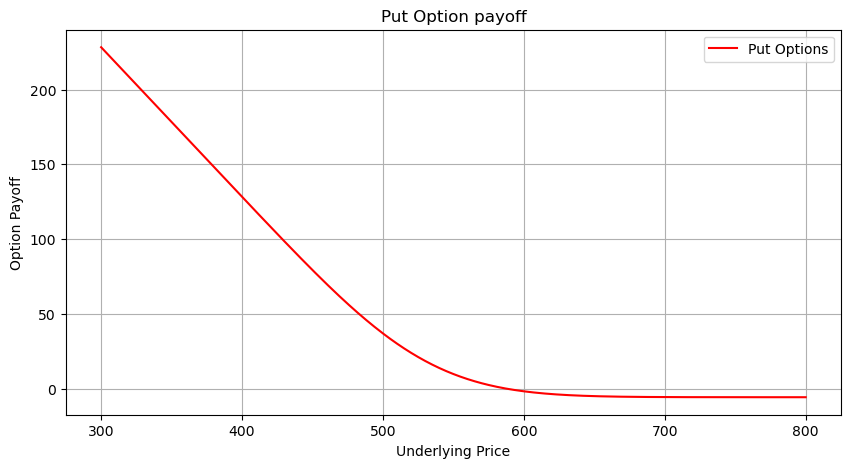

In [40]:
# 11월12일 종가시점에서 계산한 11월13일 델타 중립 포지션의 이론 payoff

from hst_funcs.finanace.Equity import BS
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 파라미터 설정
S0 = 586.73
S_max = 800
K = 535
today= datetime(2025,11,12)
maturity=datetime(2025,12,11)

# 날짜 차이 계산 (단위: 일수)
days_diff = (maturity - today).days

T = days_diff/365
r = 0.0265

C_mkt,q=5.88, 0
imvol=implied_vol_bisection(C_mkt, S0, K, r, q, T)
print(f'내재변동성: {imvol*100:.2f}%')

sigma = imvol
N = 500 # 기초자산 격자

opt_values = np.zeros(N+1)
opt_payoff = np.zeros(N+1)

opt0 = BS.bs_put(S0, K, T, r, sigma)
print('옵션 현재가치: ', opt0)
theta = BS.put_theta(S0, K, T, r, sigma)
print('옵션의 세타:',theta)

S = np.linspace(300, S_max, N+1)

for i,s in enumerate(S):
    opt_values[i]=BS.bs_put(s, K, T, r, sigma)

# 하루 뒤의 option payoff
opt_payoff=opt_values-opt0-theta

plt.figure(figsize=(10, 5))
plt.plot(S, opt_payoff, 'r', label='Put Options')
plt.xlabel('Underlying Price')
plt.ylabel('Option Payoff')
plt.legend()
plt.title("Put Option payoff")
plt.grid(True)
plt.show()

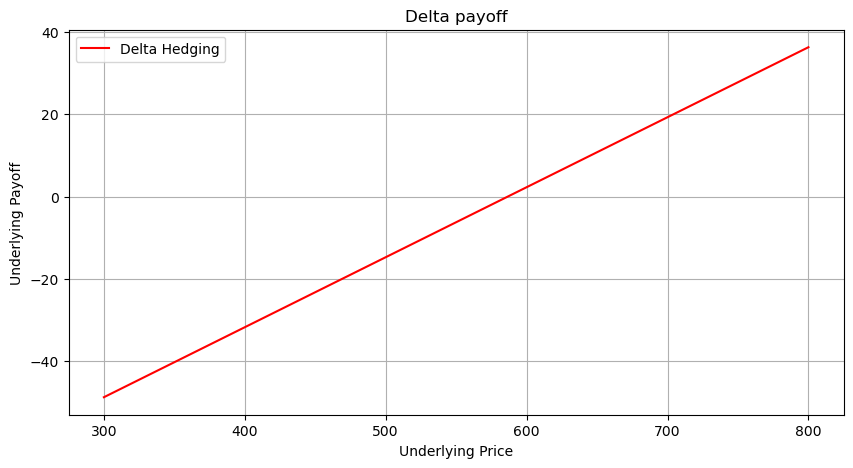

In [41]:
# with delta hedgaing
delta_payoff = np.zeros(N+1)
delta = BS.put_delta(S0, K, T, r, imvol)
delta_payoff = (S - S0) * (-delta)

plt.figure(figsize=(10, 5))
plt.plot(S, delta_payoff, 'r', label='Delta Hedging')
plt.xlabel('Underlying Price')
plt.ylabel('Underlying Payoff')
plt.legend()
plt.title("Delta payoff")
plt.grid(True)
plt.show()

옵션 현재가치:  5.880000004112787
옵션의 세타: -0.26093263602708394


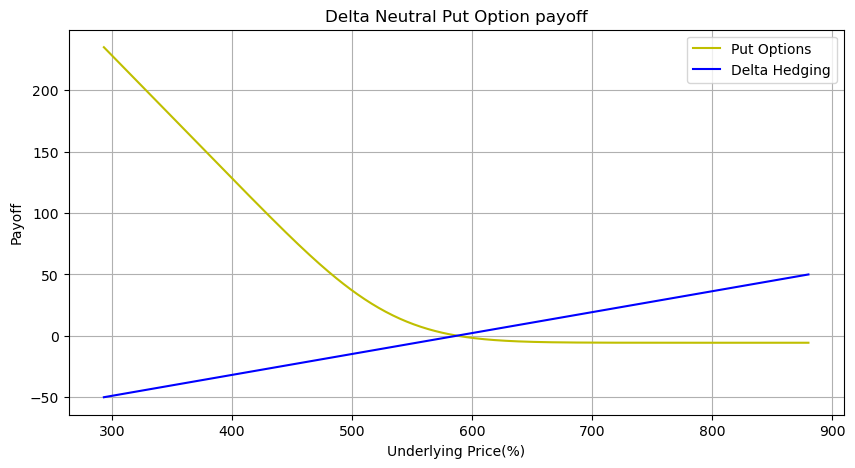

In [42]:
# 합성 payoff

from hst_funcs.finanace.Equity import BS
import numpy as np
import matplotlib.pyplot as plt

plimit=0.5

# 가격의 최소값과 최대값을 계산
min_price = S0 * (1 - plimit)
max_price = S0 * (1 + plimit)

# min_price와 max_price 사이에서 N개의 가격을 균등하게 생성
S = np.linspace(min_price, max_price, N+1)

opt_values = np.zeros(N+1)
opt_payoff = np.zeros(N+1)

opt0 = BS.bs_put(S0, K, T, r, imvol)
print('옵션 현재가치: ', opt0)
theta = BS.put_theta(S0, K, T, r, imvol)
print('옵션의 세타:',theta)



# with delta hedgaing
delta_payoff = np.zeros(N+1)
delta = BS.put_delta(S0, K, T, r, imvol)
delta_payoff = (S - S0) * (-delta)


for i,s in enumerate(S):
    opt_values[i]=BS.bs_put(s, K, T, r, imvol)

# 하루 뒤의 option payoff
opt_payoff=opt_values-opt0-theta


plt.figure(figsize=(10, 5))
plt.plot(S, opt_payoff, 'y', label='Put Options')
plt.plot(S, delta_payoff, 'b-', label='Delta Hedging')
plt.xlabel('Underlying Price(%)')
plt.ylabel('Payoff')
plt.legend()
plt.title("Delta Neutral Put Option payoff")
plt.grid(True)
plt.show()

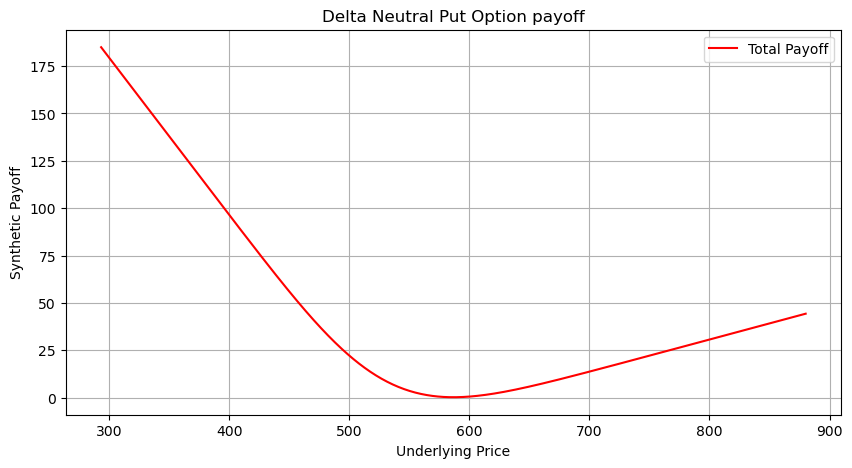

In [45]:
# 합성 payoff

# with delta hedgaing
total_payoff = np.zeros(N+1)
total_payoff= delta_payoff+opt_payoff

plt.figure(figsize=(10, 5))
plt.plot(S, total_payoff, 'r-', label='Total Payoff')
plt.xlabel('Underlying Price')
plt.ylabel('Synthetic Payoff')
plt.legend()
plt.title("Delta Neutral Put Option payoff")
plt.grid(True)
plt.show()

옵션 현재가치:  5.880000004112787
옵션의 세타: -0.26093263602708394


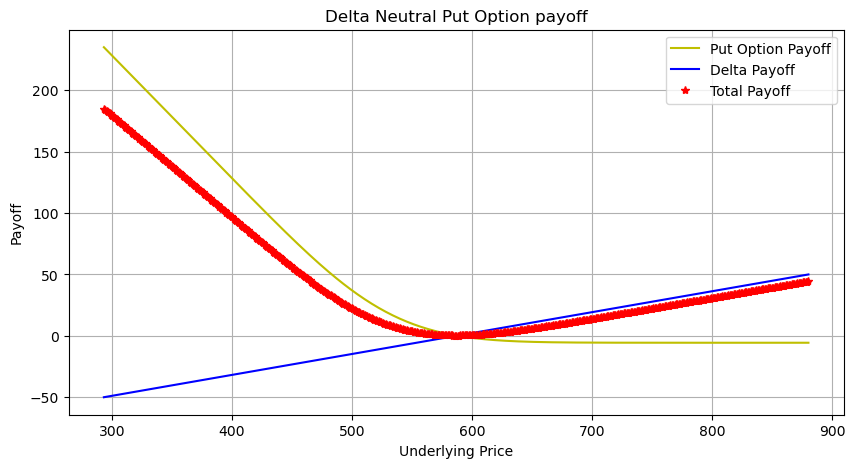

In [44]:
# 합성 payoff

from hst_funcs.finanace.Equity import BS
import numpy as np
import matplotlib.pyplot as plt

plimit=0.5

# 가격의 최소값과 최대값을 계산
min_price = S0 * (1 - plimit)
max_price = S0 * (1 + plimit)

# min_price와 max_price 사이에서 N개의 가격을 균등하게 생성
S = np.linspace(min_price, max_price, N+1)


opt_values = np.zeros(N+1)
opt_payoff = np.zeros(N+1)

opt0 = BS.bs_put(S0, K, T, r, imvol)
print('옵션 현재가치: ', opt0)
theta = BS.put_theta(S0, K, T, r, imvol)
print('옵션의 세타:',theta)

# with delta hedgaing
delta_payoff = np.zeros(N+1)
delta = BS.put_delta(S0, K, T, r, imvol)
delta_payoff = (S - S0) * (-delta)


for i,s in enumerate(S):
    opt_values[i]=BS.bs_put(s, K, T, r, imvol)

# 하루 뒤의 option payoff
opt_payoff=opt_values-opt0-theta

# 종합 payoff
total_payoff = np.zeros(N+1)
total_payoff= delta_payoff+opt_payoff

plt.figure(figsize=(10, 5))
plt.plot(S, opt_payoff, 'y', label='Put Option Payoff')
plt.plot(S, delta_payoff, 'b-', label='Delta Payoff')
plt.plot(S, total_payoff, 'r*', label='Total Payoff')
plt.xlabel('Underlying Price')
plt.ylabel('Payoff')
plt.legend()
plt.title("Delta Neutral Put Option payoff")
plt.grid(True)
plt.show()


옵션 현재가치:  -5.880000004112787
옵션의 세타: 0.26093263602708394


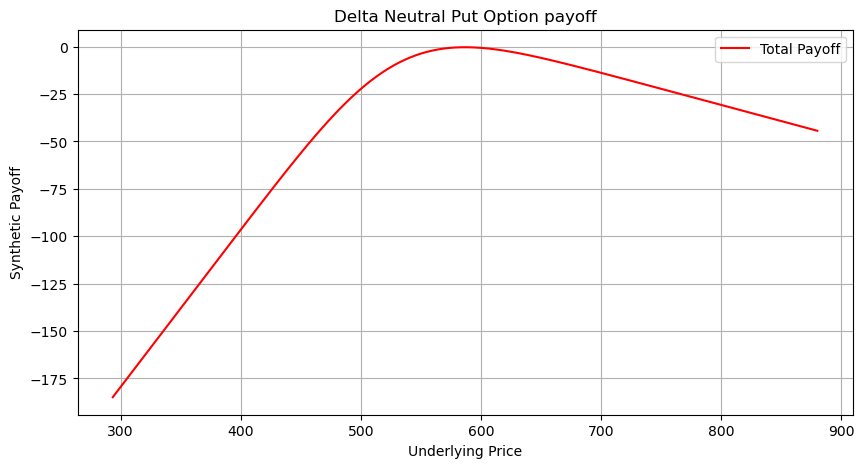

In [46]:
# 옵션 매도 델타 중립 이론 payoff

# 합성 payoff

from hst_funcs.finanace.Equity import BS
import numpy as np
import matplotlib.pyplot as plt

plimit=0.5

# 가격의 최소값과 최대값을 계산
min_price = S0 * (1 - plimit)
max_price = S0 * (1 + plimit)

# min_price와 max_price 사이에서 N개의 가격을 균등하게 생성
S = np.linspace(min_price, max_price, N+1)

opt_values = np.zeros(N+1)
opt_payoff = np.zeros(N+1)

opt0 = - BS.bs_put(S0, K, T, r, imvol)
print('옵션 현재가치: ', opt0)
theta = - BS.put_theta(S0, K, T, r, imvol)
print('옵션의 세타:',theta)



# with delta hedgaing (선물 매도 필요)
delta_payoff = np.zeros(N+1)
delta = BS.put_delta(S0, K, T, r, imvol)
delta_payoff = -(S - S0) * (-delta)


for i,s in enumerate(S):
    opt_values[i]=-BS.bs_put(s, K, T, r, imvol)

# 하루 뒤의 option payoff
opt_payoff=opt_values-opt0-theta

# with delta hedgaing
total_payoff = np.zeros(N+1)
total_payoff= delta_payoff+opt_payoff

plt.figure(figsize=(10, 5))
plt.plot(S, total_payoff, 'r-', label='Total Payoff')
plt.xlabel('Underlying Price')
plt.ylabel('Synthetic Payoff')
plt.legend()
plt.title("Delta Neutral Put Option payoff")
plt.grid(True)
plt.show()

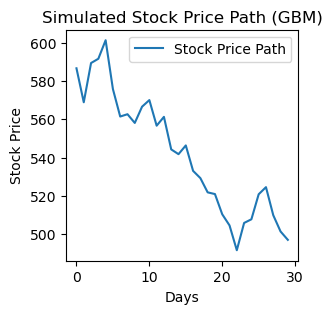

In [50]:
# 델타헤징 시뮬레이터

# 주가 path 생성하기
# 시뮬레이션 횟수 만큼 주가 생성하기
import numpy as np 
import matplotlib.pyplot as plt
from hst_funcs.finanace.Equity import BS
from datetime import datetime

# 파라미터 설정
S0 = 586.73
K = 535
today= datetime(2025,11,12)
maturity=datetime(2025,12,11)

# 날짜 차이 계산 (단위: 일수)
days_diff = (maturity - today).days


# 주가 경로 생성
N=days_diff # 만기까지의 날짜수
sim=1000 # 시뮬레이션 회수
r,sigma=0.0265, imvol
dt=1/365

#np.random.seed(111)
W = np.random.randn(N,sim)  # 표준 정규분포 난수

# log(S) 행렬 만들기
lnS=(r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * W

# 앞에 붙이기
lnS = np.insert(lnS,0,np.log(S0), axis=0)
# 누적합 구하기
S=np.exp(np.cumsum(lnS,axis=0))

# 첫번째 시뮬레이션 결과 시각화
plt.figure(figsize=(3,3))
plt.plot(S[:,0], label="Stock Price Path")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Simulated Stock Price Path (GBM)")
plt.legend()
plt.show()

In [55]:
import pandas as pd 

# -----------------------------
# 일별 델타헤지 PnL 시뮬레이션
# -----------------------------

# 첫 번째 path만 사용
S_path = S[:, 0]                      # shape: (N+1,)

# 날짜 인덱스
dates = pd.date_range(start=today, periods=len(S_path), freq="D")

n_steps = len(S_path)
opt_values = np.zeros(n_steps)
deltas = np.zeros(n_steps)
hedge_pos = np.zeros(n_steps)   # 기초자산 포지션(주수, 또는 선물 계약 수와 비례하는 단위)

# t=0 시점 옵션 가치/델타
T0 = (maturity - dates[0]).days / 365
opt_values[0], deltas[0] = BS.bs_put(S_path[0], K, T, r, sigma), BS.put_delta(S_path[0], K, T, r, sigma)

# 초기 헤지 포지션 (풋 매수 + 델타 헤지를 위해 기초자산 매수)
hedge_pos[0] = -deltas[0]   # 주식/선물 포지션

# PnL 기록용 배열
opt_pnl = np.zeros(n_steps)
hedge_pnl = np.zeros(n_steps)
total_pnl = np.zeros(n_steps)

for t in range(1, n_steps):
    # 잔존만기 (년)
    T_remain = (maturity - dates[t]).days / 365
    T_remain = max(T_remain, 1)

    # 현재 옵션 가치와 델타
    opt_values[t], deltas[t] = BS.bs_put(S_path[t], K, T_remain, r, sigma), BS.put_delta(S_path[t], K, T_remain, r, sigma)
   
    # (t-1) -> t 구간 옵션 PnL
    opt_pnl[t] = opt_values[t] - opt_values[t-1]

    # (t-1) 시점에 보유하던 헤지 포지션으로 기초자산 PnL
    hedge_pnl[t] = hedge_pos[t-1] * (S_path[t] - S_path[t-1])

    # 전체 PnL
    total_pnl[t] = opt_pnl[t] + hedge_pnl[t]

    # t 시점에 새 델타에 맞게 리밸런싱
    hedge_pos[t] = -deltas[t]

# 누적 PnL
cum_total_pnl = np.cumsum(total_pnl)

# -----------------------------
# 이터프레임으로 정리
# -----------------------------
df = pd.DataFrame({
    "Date": dates,
    "Spot": S_path,
    "OptionValue": opt_values,
    "Delta": deltas,
    "HedgePosition": hedge_pos,
    "OptionPnL": opt_pnl,
    "HedgePnL": hedge_pnl,
    "TotalPnL": total_pnl,
    "CumTotalPnL": cum_total_pnl
})

df.set_index("Date", inplace=True)
df

,Spot,OptionValue,Delta,HedgePosition,OptionPnL,HedgePnL,TotalPnL,CumTotalPnL
Date,,,,,,,,
2025-11-12,586.730000,5.880000,-0.170284,0.170284,0.000000,0.000000,0.000000,0.000000
2025-11-13,568.941529,58.632488,-0.336291,0.336291,52.752488,-3.029095,49.723392,49.723392
2025-11-14,589.482506,52.079194,-0.302235,0.302235,-6.553293,6.907748,0.354455,50.077847
2025-11-15,591.722496,51.406171,-0.298686,0.298686,-0.673023,0.677004,0.003980,50.081828
2025-11-16,601.421148,48.582505,-0.283694,0.283694,-2.823666,2.896855,0.073189,50.155017
2025-11-17,575.860407,56.346650,-0.324514,0.324514,7.764145,-7.251439,0.512706,50.667723
2025-11-18,561.484586,61.188586,-0.349331,0.349331,4.841936,-4.665161,0.176775,50.844498
2025-11-19,562.699440,60.765507,-0.347182,0.347182,-0.423080,0.424386,0.001306,50.845805
2025-11-20,558.135309,62.368575,-0.355304,0.355304,1.603068,-1.584584,0.018485,50.864289


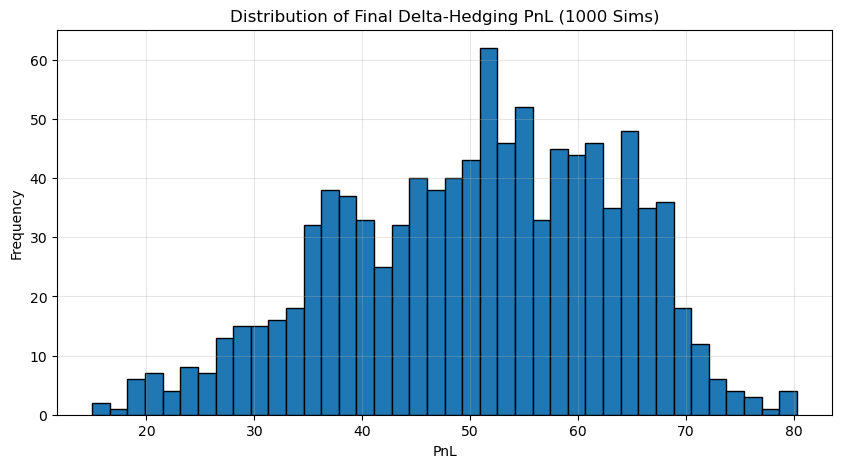

===== Final PnL Statistics =====
Mean PnL      : 50.60
Std Dev PnL   : 12.67
Min PnL       : 14.97
Max PnL       : 80.28


In [57]:
# ----------------------------------------
# 모든 시뮬레이션 경로에 대해 Delta Hedging PnL 계산
# ----------------------------------------
n_sim=1000

final_pnl = np.zeros(n_sim)

for sim in range(n_sim):

    # (1) 주가 경로 생성
    W = np.random.randn(N)
    lnS = (r - 0.5 * sigma**2)*dt + sigma*np.sqrt(dt)*W
    lnS = np.insert(lnS, 0, np.log(S0))
    S_path = np.exp(np.cumsum(lnS))

    # 날짜 생성
    dates = pd.date_range(start=today, periods=len(S_path), freq='D')

    # 기록 배열
    option_values = np.zeros(N+1)
    deltas = np.zeros(N+1)
    hedge_pos = np.zeros(N+1)
    option_pnl = np.zeros(N+1)
    hedge_pnl = np.zeros(N+1)
    total_pnl = np.zeros(N+1)

    # t=0 옵션가격·델타
    T0 = (maturity - dates[0]).days/365
    option_values[0], deltas[0] = BS.bs_put(S_path[0], K, T, r, sigma), BS.put_delta(S_path[0], K, T, r, sigma)
    hedge_pos[0] = -deltas[0]

    # (2) 일별 델타헤징
    for t in range(1, N+1):
        T_remain = (maturity - dates[t]).days / 365
        if T_remain <= 0:
            T_remain = 1

        option_values[t], deltas[t] = BS.bs_put(S_path[t], K, T_remain, r, sigma), BS.put_delta(S_path[t], K, T_remain, r, sigma)

        option_pnl[t] = option_values[t] - option_values[t-1]
        hedge_pnl[t] = hedge_pos[t-1] * (S_path[t] - S_path[t-1])
        total_pnl[t] = option_pnl[t] + hedge_pnl[t]

        hedge_pos[t] = -deltas[t]

    final_pnl[sim] = np.sum(total_pnl)  # 마지막 cumulative PnL


# ----------------------------------------
# 4) 결과 그래프 + 평균/표준편차 출력
# ----------------------------------------
plt.figure(figsize=(10,5))
plt.hist(final_pnl, bins=40, edgecolor='black')
plt.title("Distribution of Final Delta-Hedging PnL (1000 Sims)")
plt.xlabel("PnL")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

print("===== Final PnL Statistics =====")
print("Mean PnL      : {:,.2f}".format(final_pnl.mean()))
print("Std Dev PnL   : {:,.2f}".format(final_pnl.std()))
print("Min PnL       : {:,.2f}".format(final_pnl.min()))
print("Max PnL       : {:,.2f}".format(final_pnl.max()))